# High Level Features: LHC Olympics 2020 anomaly detection 3-prong dataset

In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../scripts/')
from variables import *
from utils import *

## Load data

### QCD background, 2-prong and 3-prong signals
High level features ae used for this study.    
High level features: variables which are computed using other low-level vriables. These variables are defined based on physics motivation.

### Raw dataset
The dataset is available here: https://zenodo.org/record/4536377#.YHTfCBNKhTZ   

* It consists of 1M QCD dijet events and 100k W'->XY events, where both X and Y decays into two quarks; X->qq and Y->qq. The events are randomly shuffled together.
* A signal/background truth bit for each event is provided to identify the signal and background events.
* It also consists 100k W'-> XY events where both X and Y decays into three quarks; X->qqq and Y->qqq.
* The W', X, and Y masses are 3.5 TeV, 500 GeV and 100 GeV respectively.

In [2]:
# Raw input data where background and signal are randomly mixed
raw_input = pd.read_hdf("../data/events_anomalydetection_v2.features.h5")

# Raw input data with 3-prong signals
raw_input_3prong = pd.read_hdf("../data/events_anomalydetection_Z_XY_qqq.features.h5")

In [3]:
rawdata_3prong_shape = raw_input_3prong.shape
rawdata_3prong_features = list(raw_input_3prong.columns)
print("Shape of the raw dataframe: ", rawdata_3prong_shape)
print ("Features in the raw dataframe: ", rawdata_3prong_features)

Shape of the raw dataframe:  (100000, 14)
Features in the raw dataframe:  ['pxj1', 'pyj1', 'pzj1', 'mj1', 'tau1j1', 'tau2j1', 'tau3j1', 'pxj2', 'pyj2', 'pzj2', 'mj2', 'tau1j2', 'tau2j2', 'tau3j2']


In [4]:
# open the raw input file
df_sig_bkg = load_data(raw_input)

#signal and background events can be identified using the `label` feature
# Signal: label=1
# Backgrouns: label=0
df_bkg = df_sig_bkg.loc[df_sig_bkg['label'] == 0]
df_sig_2prong = df_sig_bkg.loc[df_sig_bkg['label'] == 1]

# open the 3-prong signal
df_sig_3prong = load_data(raw_input_3prong)

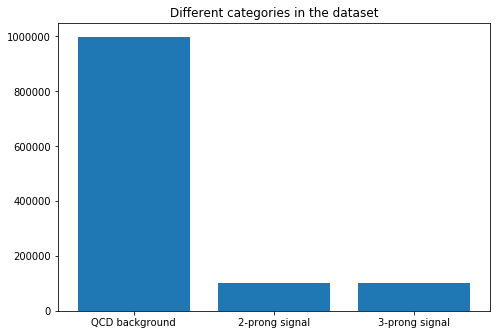

In [5]:
n_bkg = df_bkg.shape[0]
n_sig_2prong = df_sig_2prong.shape[0]
n_sig_3prong = df_sig_3prong.shape[0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
categories = ['QCD background', '2-prong signal', '3-prong signal']
evnts = [n_bkg, n_sig_2prong, n_sig_3prong]
ax.bar(categories,evnts)
plt.title("Different categories in the dataset")
plt.show()

## Data visualization

In [6]:
## 2D plots
def plot_inputs_2d(var1, var2, df_sig, df_bkg):
    '''
    makes 2D plots of the input variables 
    '''
    nbins_var1 = var_nbins[var1]
    nbins_var2 = var_nbins[var2]
    min_var1 = var_range[var1][0]
    max_var1 = var_range[var1][1]
    min_var2 = var_range[var2][0]
    max_var2 = var_range[var2][1]
    
    fig = plt.figure(figsize=(12,4))
    fig.subplots_adjust(hspace=0.6, wspace=0.4)
    

    ax = fig.add_subplot(1, 2, 1)
    #plt.text(0.5, 0.5, str((2, 4, i)), fontsize=18, ha='center')
    plt.title("Signal (3-prong)")
    plt.hist2d(df_sig[var1], df_sig[var2], bins = [nbins_var1, nbins_var2], range = [[min_var1, max_var1], [min_var2, max_var2]], cmap = 'inferno')
    plt.ylabel(var_axis_label[var2])
    plt.xlabel(var_axis_label[var1])
    ax = fig.add_subplot(1, 2, 2)
    plt.title("Background")
    plt.hist2d(df_bkg[var1], df_bkg[var2], bins = [nbins_var1, nbins_var2], range = [[min_var1, max_var1], [min_var2, max_var2]], cmap = 'inferno')
    plt.ylabel(var_axis_label[var2])
    plt.xlabel(var_axis_label[var1])
    #plt.legend()

### Masses of X and Y are 100 GeV and 500 GeV for both 2-prong and 3-prong signals

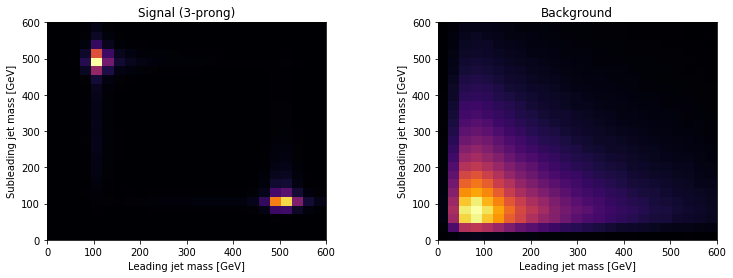

In [7]:
plot_inputs_2d('mj1', 'mj2', df_sig_3prong, df_bkg)

In [8]:
def plot_variables(var, title, density = False, legend_location = 'upper right'):
    nbins = var_nbins[var]
    min_var = var_range[var][0]
    max_var = var_range[var][1]
    
    plt.title(title)
    if density == False:
        plt.ylabel("Events")
    else:
        plt.ylabel("Normalized events")
    plt.xlabel(var_axis_label[var])
    plt.hist(df_sig_bkg[var], bins = nbins, range = (min_var, max_var), color = "tab:blue",  histtype = "step", label = "Signal + Background", density = density)
    plt.hist(df_bkg[var], bins = nbins, range = (min_var, max_var), color = "tab:green", alpha = 0.3, label = "Background", density = density)
    plt.hist(df_sig_2prong[var], bins = nbins, range = (min_var, max_var), color = "tab:red", linestyle = 'dashed', histtype = "step", label = "Signal (2-prong)", density = density)
    plt.hist(df_sig_3prong[var], bins = nbins, range = (min_var, max_var), color = "tab:pink", histtype = "step", label = "Signal (3-prong)", density = density)
    plt.legend(loc = legend_location)

### Mass of the di-jet system
The background distribution follows a decreasing trend and the signal is expected to appear as a bump on the dijet mass distribution. In this example is signal masses are 3500 GeV.

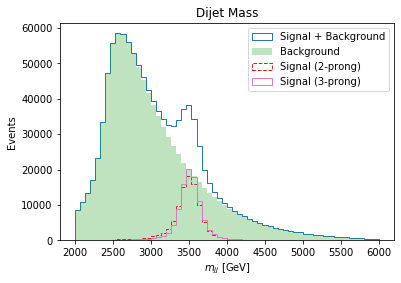

In [9]:
plot_variables("mjj", "Dijet Mass")

### Energy of the di-jet system
The same trend as the mass distribution and the signal is expected to appear as a bump on the dijet energy distribution.

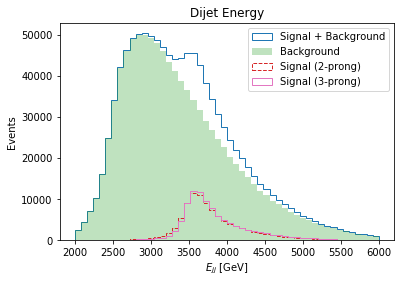

In [10]:
plot_variables("ejj", "Dijet Energy")

### Nsubjettiness ($\tau_{21}$) 
The background distribution is expected to be very different from the signal. $\tau_{21}$ is one of the most sensitive quantity since the signal jets have either 2-prong or 3-prong structure.

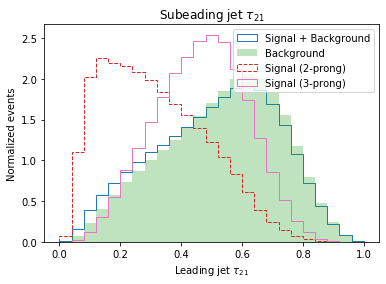

In [11]:
plot_variables("tau21j1", "Subeading jet $\\tau_{21}$", True)

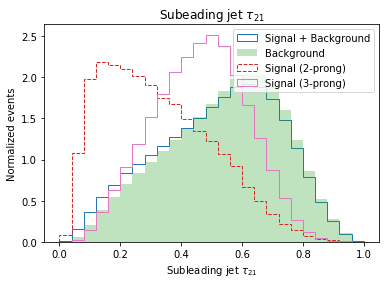

In [12]:
plot_variables("tau21j2", "Subeading jet $\\tau_{21}$", True)

### Nsubjettiness ($\tau_{31}$) 
For the 3-prong signals $\tau_{32}$ is more different than the QCD background compared to the 2-prong signal.

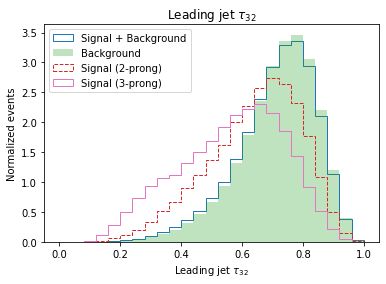

In [13]:
plot_variables("tau32j1", "Leading jet $\\tau_{32}$", True, 'upper left')

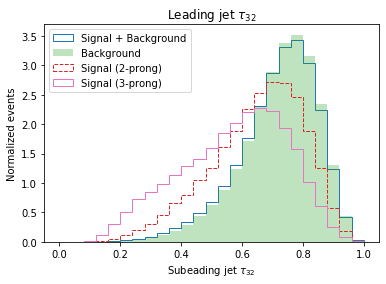

In [14]:
plot_variables("tau32j2", "Leading jet $\\tau_{32}$", True, 'upper left')